In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report


In [2]:
# 2. Load Dataset
df = pd.read_csv(r"C:\Users\R Y Z E N\Desktop\heart_cleveland_upload.csv")
print("Shape:", df.shape)
df.head()


Shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
# 3. Data Cleaning
# ------------------------------------------
# Check missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [4]:
# Target column is usually 'target' or 'num' — ensure it's binary
if 'target' in df.columns:
    target_col = 'target'
elif 'num' in df.columns:
    target_col = 'num'
    # Convert >0 values to 1 (indicating heart disease)
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df.drop(columns='num', inplace=True)


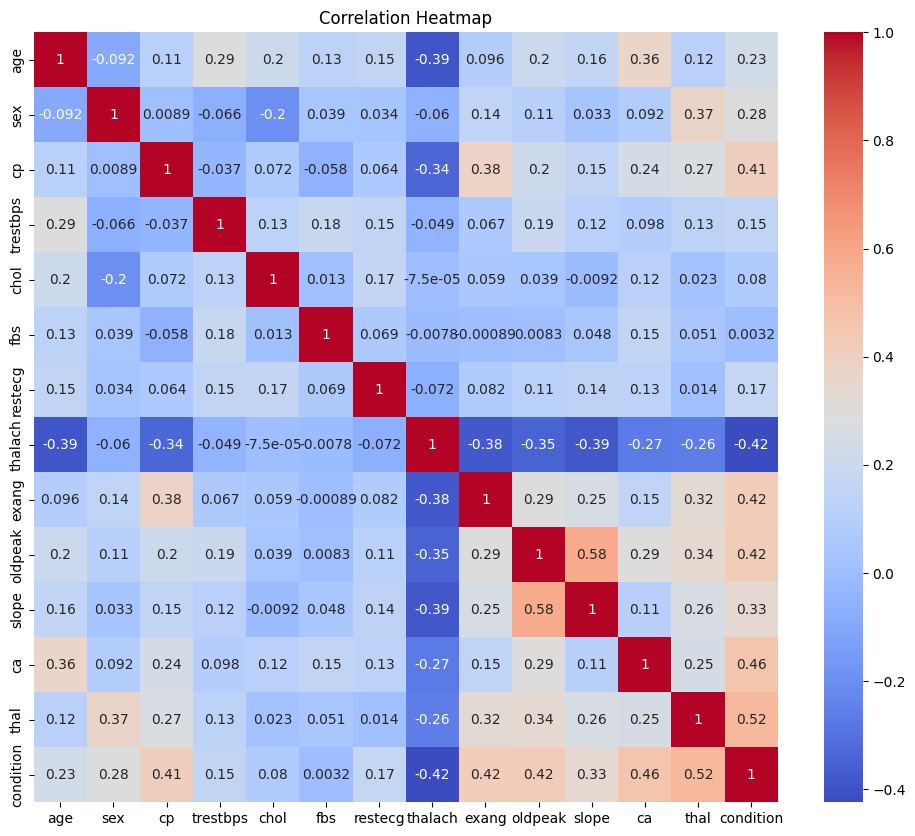

In [5]:
# 4. Exploratory Data Analysis
# ------------------------------------------
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\R Y Z E N\AppData\Local\Temp\ipykernel_22748\1390022434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='condition', palette='Set2')


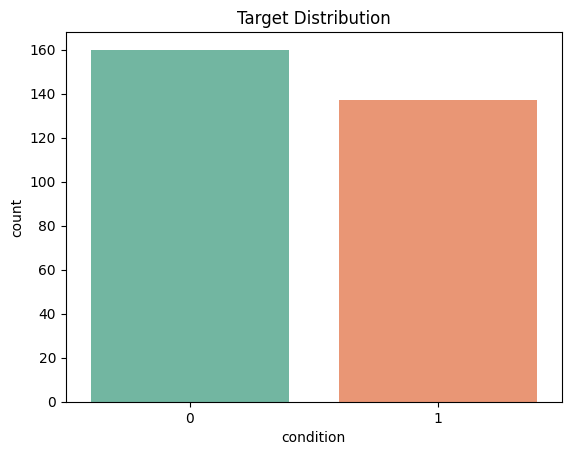

In [6]:
# Target distribution
sns.countplot(data=df, x='condition', palette='Set2')
plt.title("Target Distribution")
plt.show()

In [8]:
# 5. Feature Matrix and Scaling
# ------------------------------------------
X = df.drop(columns='condition')
y = df['condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 6. Train Logistic Regression Model
# ------------------------------------------
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# 7. Evaluation
# ------------------------------------------
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Accuracy: 0.7333333333333333
ROC-AUC Score: 0.8415178571428571


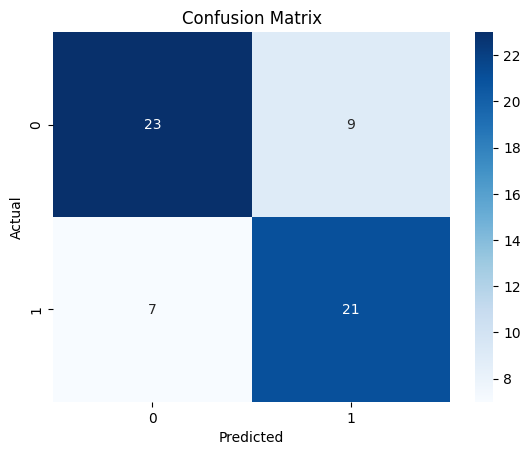

In [11]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

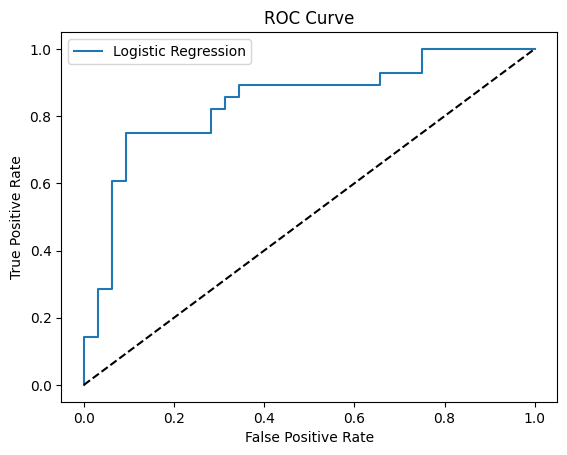

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


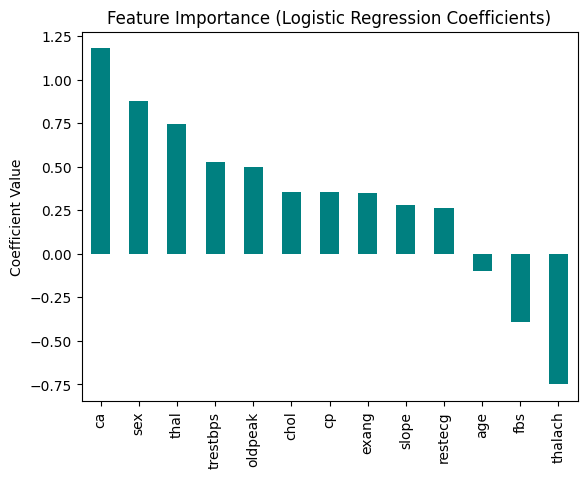

In [13]:
# 8. Feature Importance (Coefficients)
# ------------------------------------------
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()
